# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.


# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score 
based upon the number of hours they studied. This is a simple linear regression task as it involves 
just two variables.

Author: Sanjeev Kumar Prajapati

# Importing required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Read the data 

In [4]:
data= pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

Data imported successfully


In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [49]:
data.shape

(10, 2)

# Checking missing values

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Data Visualization

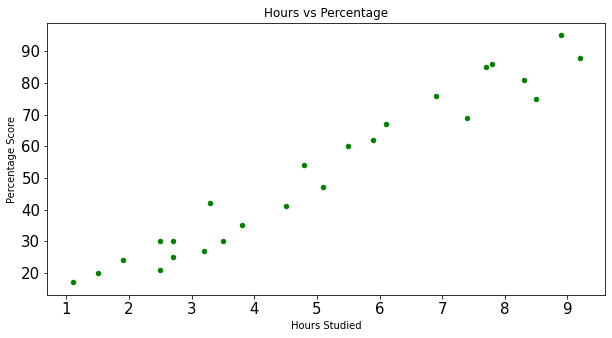

In [18]:
data.plot(x="Hours", y="Scores",kind="scatter",fontsize=15,color="green",figsize=(10,5))  
plt.title("Hours vs Percentage")  
plt.xlabel("Hours Studied")  
plt.ylabel("Percentage Score")  
plt.show()

# Modeling the data

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [30]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  
#split the data into two part 1.) training and 2.) Testing part using train_test_split function
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=2)
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

# Find Coefficient and Intercept

In [32]:
print("Coefficient is :",lr.coef_)
print("Intercept is : ",lr.intercept_)

Coefficient is : [10.26062239]
Intercept is :  1.1138100335929622


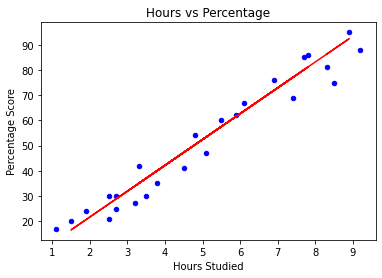

In [36]:
#we can also plot the fit line over the data in single Linear Regression
data.plot(x="Hours",y="Scores",color="b",kind="scatter")
plt.plot(X_train,lr.coef_[0]*X_train+lr.intercept_,color="r")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel('Percentage Score')  
plt.show()

# Evaluation of the model

Now that we have trained our algorithm, it's time to make some predictions.

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Y_pred=lr.predict(X_test)
print("Mean Absolute Error: ",mean_absolute_error(Y_pred, Y_test))
print("R2-score %.2f:"%r2_score(Y_pred,Y_test))

Mean Absolute Error:  5.712732105282583
R2-score 0.95:


# Comparing Actual vs Predicted

In [40]:
df=pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})

In [43]:
df.head()

,Actual,Predicted
0,17,12.400495
1,21,26.765366
2,24,20.608993
3,88,95.511536
4,76,71.912105


# Predicting the Score with the single input value

In [48]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 96.02456716748495


# Thankyou!